<a href="https://colab.research.google.com/github/MadmanMarble/Planet_U-NET/blob/main/Planet_training_U_Net_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 45.1 MB/s eta 0:00:00


In [76]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras.utils import normalize
import os
import glob
import cv2
import numpy as np
from matplotlib import pyplot as plt
import rasterio
from sklearn.model_selection import train_test_split
import shutil
import rasterio
from rasterio.plot import show
from sklearn.model_selection import train_test_split
import random

### read one file

384 384 5


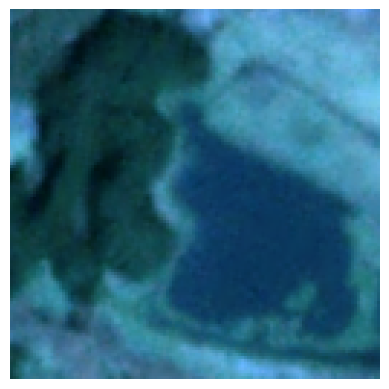

In [46]:
with rasterio.open(r'/content/drive/MyDrive/DeepLearning_Project/planet_OneYear/images/1131_planet_stack_utm4.tif') as src:
  temp_img = src.read()

print(src.height, src.width, src.count)

temp_img = temp_img[:3, :, :].transpose(1, 2, 0)

temp_img_norm = temp_img /np.max(temp_img)
plt.imshow(temp_img_norm)
plt.axis('off')
plt.show()

384 384 1
Labels are:  [ 2.  3. 10.] and the counts are: [45505 97547  4404]


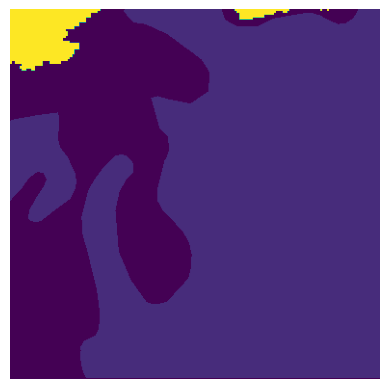

In [52]:
with rasterio.open(r'/content/drive/MyDrive/DeepLearning_Project/planet_OneYear/labels/1131_nwi_ccap_filled_utm4.tif') as src:
  temp_mask = src.read(1)

print(src.height, src.width, src.count)

# what labels are in this file?
labels, count = np.unique(temp_mask, return_counts=True)
print("Labels are: ", labels, "and the counts are:", count)

plt.imshow(temp_mask)
plt.axis('off')
plt.show()

In [54]:
root_directory = "/content/drive/MyDrive/DeepLearning_Project/planet_OneYear/"

### Code for splitting folder into training, validation

In [66]:
# Ensure the lists are sorted so that images and labels correspond to each other
planet_images = sorted(glob.glob(f"/content/drive/MyDrive/DeepLearning_Project/planet_OneYear/images/*.tif"))
planet_labels = sorted(glob.glob(f"/content/drive/MyDrive/DeepLearning_Project/planet_OneYear/labels/*.tif"))

# Split the file paths into training, validation, and testing sets (80% train, 20% validation)
train_img, val_img, train_label, val_labels, = train_test_split(
    planet_images, planet_labels, test_size = 0.2, random_state = 42)

In [72]:
train_img_dir = train_img
train_label_dir = train_label
val_img_dir = val_img
val_label_dir = val_labels
print(len(train_img_dir))
print(len(train_label_dir))
print(len(val_img_dir))
print(len(val_label_dir))

2260
2260
565
565


In [93]:
img_num = random.randint(0, len(train_img_dir))

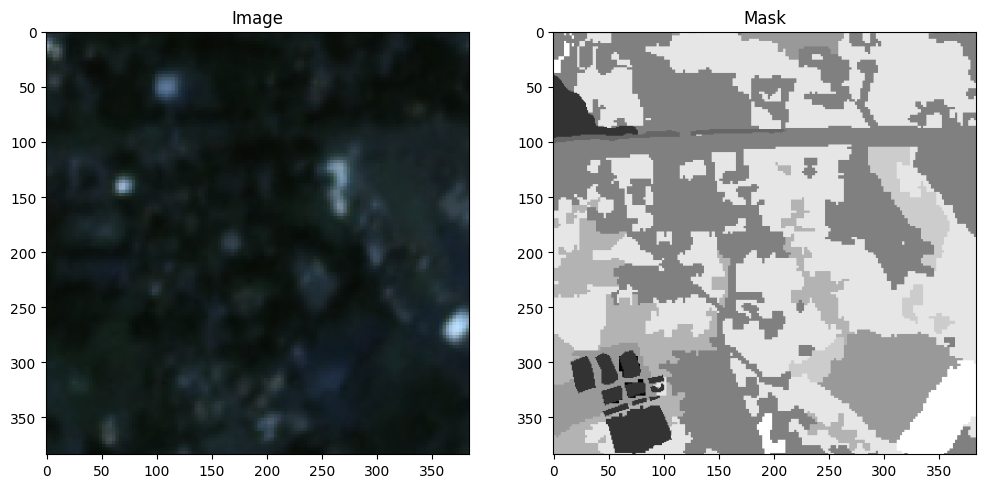

In [94]:
img_for_plot = rasterio.open(train_img_dir[img_num])
img_for_plot = img_for_plot.read()
img_for_plot = img_for_plot[:3, :, :].transpose(1, 2, 0)
img_for_plot_norm = img_for_plot /np.max(img_for_plot)

label_for_plot = rasterio.open(train_label_dir[img_num])
label_for_plot = label_for_plot.read(1)

# temp_img = temp_img[:3, :, :].transpose(1, 2, 0)

plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(img_for_plot_norm)
plt.title('Image')
plt.subplot(122)
plt.imshow(label_for_plot, cmap='gray')
plt.title('Mask')
plt.show()
